In [6]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs


In [7]:
# Pretty display for notebooks
%matplotlib inline

#Load the csv data
data = pd.read_csv("census.csv")

#Display the data
display(data.head(n=1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


In [8]:
df = pd.DataFrame(data)
# TODO: Total number of records
n_records = data.shape[0]
                            #  or 
                            #  nrecord = len(df.index)


# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = len(df[df.income == ">50K"])

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = len(df[df.income == "<=50K"])


# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = float(n_greater_50k) / float(n_records) * 100

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 1199
Individuals making more than $50,000: 298
Individuals making at most $50,000: 900
Percentage of individuals making more than $50,000: 24.854045037531275%


/home/ratna/Documents/ML/finding_doners/visuals.py:48: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


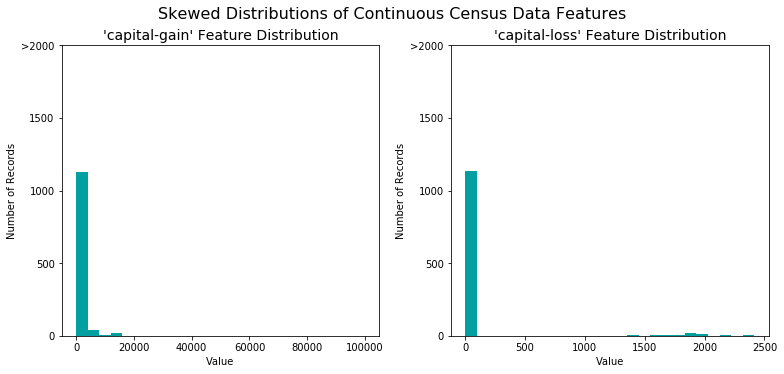

In [9]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

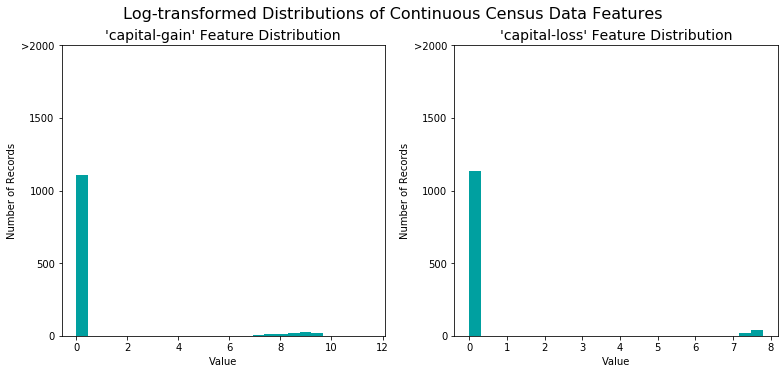

In [10]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x : np.log(x+1))


# Visualize the new log distribution
vs.distribution(features_log_transformed , transformed = True)

In [11]:
# Normalizing Numerical Features
# Import sklearn.preprocessing.StandardScaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_maxmin_transform = pd.DataFrame(data = features_log_transformed)
features_log_maxmin_transform[numerical] = scaler.fit_transform(features_log_maxmin_transform[numerical])

## Show an example of a record with scaling applied
display(features_log_maxmin_transform[numerical].head(n = 5))

/home/ratna/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,age,education-num,capital-gain,capital-loss,hours-per-week
0,0.301370,0.800000,0.667492,0.0,0.397959
1,0.452055,0.800000,0.000000,0.0,0.122449
2,0.287671,0.533333,0.000000,0.0,0.397959
3,0.493151,0.400000,0.000000,0.0,0.397959
4,0.150685,0.800000,0.000000,0.0,0.397959


In [12]:
# Implementing preprocessed data

# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_maxmin_transform)

# TODO: Encode the 'income_raw' data to numerical values
income = income_raw.apply(lambda x:1 if x == '>=50k' else 0)

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} Total features after one hot encoding".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print(encoded)

92 Total features after one hot encoding
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ Adm-clerical', 'occupation_ A

In [13]:
# Import train_test_split

from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final , 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)
# Show the results of the split
print("Training set samples are {}".format(X_train.shape[0]))
print("Testing set samples are {}".format(X_test.shape[0]))

Training set samples are 959
Testing set samples are 240


In [16]:
# Evaluating model Performance
##  Investigating 4 Algorithms of Supervised Learning

# Naive Predictor
'''
TP = np.sum(income_raw)# Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
                         #encoded to numerical values done in the data preprocessing step.
FP = income_raw.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

print(TP)
print(FP)
print(TN)
print(FN)

# TODO: Calculate accuracy, precision and recall
accuracy = None
recall = None
precision = None

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
fscore = None

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))
'''

#  As don't know the values across the details so, calculate dfor random numbers.

# TODO: Calculate accuracy
accuracy = float(11208) / float(45222)

# TODO: Calculate F-score using the formula above for beta = 0.5
fscore = float((1+.25)*(float(11208)/float(45222*1)))/float(((.25 * float(11208)/float(45222)) + 1))

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))



Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


In [17]:
# Implementation - Creating a training and Predicting Pipeline -

import sklearn
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train ,  average = 'binary' , beta = 0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test ,  average = 'binary' , beta = 0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results


